In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver
import os

api_key = os.getenv('GROQ_API_KEY')
load_dotenv()

True

In [10]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [11]:
llm = ChatGroq(model="llama-3.1-8b-instant", api_key=api_key)

In [12]:
def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

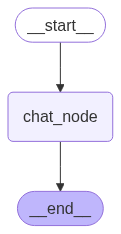

In [13]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [14]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [15]:
thread_id = '1'

while True:

    user_message = input('Type here: ')

    print('User:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]}, config=config)

    print('AI:', response['messages'][-1].content)

User: hi
AI: How can I assist you today?
User: my name is subh
AI: Nice to meet you, Subh. Is there something I can help you with or would you like to chat?
User: can you add 10 to 100
AI: 100 + 10 = 110.
User: now multiply the result with 2
AI: 110 * 2 = 220.
User: exit


In [16]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='be0b41d7-b33d-4a35-9539-d906cd080a8a'), AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.000356926, 'prompt_time': 0.010427334, 'queue_time': 5.252949085, 'total_time': 0.01078426}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--49432ab5-62c3-425c-a2c4-58802b5e36d2-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44}), HumanMessage(content='my name is subh', additional_kwargs={}, response_metadata={}, id='8592c747-c07b-4443-b957-f88a209b9353'), AIMessage(content='Nice to meet you, Subh. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_